In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

In [24]:
#Reading the dataset
data = pd.read_csv('Capacity_Utilisation_in_Crude_Steel_Production_0.csv')
data.set_index("(Quantity in '000 Tonnes)", drop = True)

#Segregating the data into different dataframes
public = data.iloc[0:3]
private = data.iloc[2:5]
india = data.iloc[4:7]

public_np = public.iloc[:-1,1:].to_numpy()
private_np = private.iloc[:-1,1:].to_numpy()
india_np = india.iloc[:-1,1:].to_numpy()

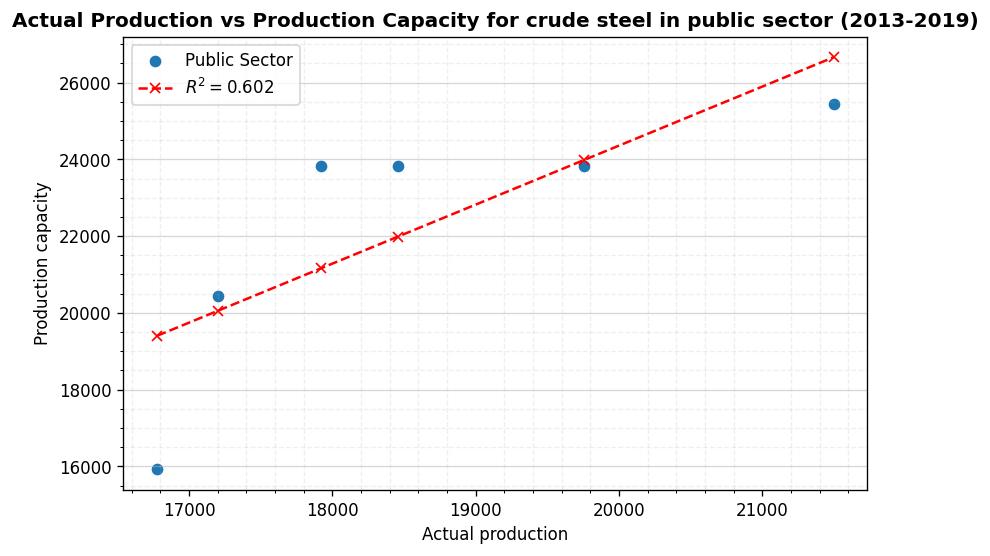

In [25]:
#Scatter plots
xarr = list(data.columns)[1:]
plt.figure(figsize = (8,5), dpi = 120)
plt.scatter(public_np[0,:], public_np[1,:], label = 'Public Sector')
# plt.scatter(private_np[0,:], private_np[1,:], label = 'Private Sector')
# # plt.scatter(india_np[0,:], india_np[1,:], label = 'All India')
# plt.xscale('log')
# plt.yscale('log')
x = public_np[0,:]
y = public_np[1,:]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#Computing R2 score
score = round(r2_score(y, p(x)), 3)
r2_score_label = "$R^{2} = " + str(score) + "$"
plt.plot(x, p(x), "--x", label = r2_score_label, color = 'red')
plt.xlabel("Actual production")
plt.ylabel("Production capacity")
plt.title("Actual Production vs Production Capacity for crude steel in public sector (2013-2019)", weight = 'bold')
plt.legend(loc = 'best')
plt.grid(which='minor',axis='both',linestyle='--',alpha=0.2)
plt.grid(which='major',axis='y',linestyle='-',alpha=0.5)
plt.minorticks_on()
# plt.axis('equal')
plt.savefig("Scatter_plot_example.jpeg", dpi = 200, bbox_inches = 'tight')
plt.show()